# Downloading the GCM and RCM datasets used in this paper 

In [1]:
# import or install libraries:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import torch
import numpy as np
import netCDF4 as nc
os.system('pip install cartopy')
import cartopy.crs as ccrs
import cartopy
os.system("pip install packaging importlib.metadata")
from importlib.metadata import version
from packaging.version import parse
import matplotlib.pyplot as plt
cartopy_version = parse(version("cartopy"))


In [2]:
# download the GCM and CCLM data into a local folder:
os.system("gdown --folder https://drive.google.com/drive/folders/1fpx8nsgGDL2t7qZESZuBw2FijKBobhza?usp=drive_link")


Retrieving folder list


Retrieving folder 1ue89pcVjZorHh1fA-unft6RPY1sCBM0V dataset
Retrieving folder 19c04wkB3q3zV-oe6362PzHzeY3n4xgDO test
Processing file 1Ae0e-fbfIzqgMxUvtpI4oz-trmfo5GqF input_test.pt
Processing file 1mmEjENE8JYSBYdRVboTXob1Po-fqYXsQ target_test.pt
Retrieving folder 1Po-blyGr5JyaMqNQmwTWMQdeiF5Ntr6Y train
Processing file 19ZHcF0OnwQWkBh7XgchIR7Nvwp3-p5F4 input_train.pt
Processing file 1ByrWbIsLb0LxiJKPfGRjLG-_-HRAx0a4 target_train.pt
Retrieving folder 13E6W5IUCIOFeZLA0GTQJc4AOSW2PUvqw val
Processing file 1gQz2WiXYkRgD1D4ae15M398J9V7WjdpN input_val.pt
Processing file 1L5iDDbcaQKPf2WOC8xMjZAshrrUv3zqA target_val.pt
Retrieving folder 1cEMd3NdznUKdE56fSEDGiaEmwjODYkqL dataset_EC-Earth3-Veg
Retrieving folder 1ie-xY_8jj2LvCK_PjR2-Gy65Waa3WoeY test
Processing file 17uSFhdPLhkQ-dGYCARiPFqCCVdu69BnA input_test.pt
Processing file 1-fZY_JqH230y0ZchZM-j5WJQdXsCOOYg target_test.pt
Retrieving folder 1eYUcX3tpkmD9gxBr8ypnR9oJY7ZBBCxB train
Processing file 1n8KqJmVPwHcHE6sqG4JG0hzrva-AFzEt input_train.pt

Retrieving folder list completed
Building directory structure


Building directory structure completed


Downloading...
From (uriginal): https://drive.google.com/uc?id=1Ae0e-fbfIzqgMxUvtpI4oz-trmfo5GqF
From (redirected): https://drive.google.com/uc?id=1Ae0e-fbfIzqgMxUvtpI4oz-trmfo5GqF&confirm=t&uuid=2ea2f3fd-8d08-42a0-ac38-acc3008537a4
To: /home/bijan/Documents/gmd_paper/data/dataset/test/input_test.pt
100%|██████████| 164M/164M [00:07<00:00, 22.4MB/s] 


In [ ]:
# clone the code from github:
!git clone https://github.com/RolnickLab/constrained-downscaling.git


In [11]:

# run with soft constraining
!python constrained-downscaling/main.py --dataset dataset --model cnn --model_id twc_cnn_soft_constraints_epochs_160_lr_0.00001_alpha_0.99 --constraints soft --loss mass_constraints --alpha 0.99 --epochs 160 --batch_size 64 --lr 0.00001


68136
68136
68136
68136
22713
22713
22713
22713
#params: 100833
Epoch 1, Train Loss: 0.001747176459598
Val loss: 0.000049652509239
Epoch 2, Train Loss: 0.000039055756886
Val loss: 0.000035552295615
Epoch 3, Train Loss: 0.000029931287416
Val loss: 0.000017215345565
Epoch 4, Train Loss: 0.000008602186534
Val loss: 0.000006695593381
Epoch 5, Train Loss: 0.000006348533093
Val loss: 0.000006207950814
Epoch 6, Train Loss: 0.000005912875468
Val loss: 0.000005718671947
Epoch 7, Train Loss: 0.000005457298677
Val loss: 0.000005209294580
Epoch 8, Train Loss: 0.000004984764424
Val loss: 0.000004713259190
Epoch 9, Train Loss: 0.000004505150594
Val loss: 0.000004257966896
Epoch 10, Train Loss: 0.000004055543101
Val loss: 0.000003815556991
Epoch 11, Train Loss: 0.000003615213007
Val loss: 0.000003377023838
Epoch 12, Train Loss: 0.000003187543191
Val loss: 0.000003053490395
Epoch 13, Train Loss: 0.000002782020698
Val loss: 0.000002547329745
Epoch 14, Train Loss: 0.000002396106432
Val loss: 0.000002219

## Plot the model output results

In [21]:
model = "cnn_acadd_alpha_0.99"
# load the sample prediction
data_dir = "/home/bijan/Downloads/constrained-downscaling/data/"
file = data_dir+"prediction/my_own_test_twc_cnn_acadd_constraints_epochs_150_lr_0.00001_alpha_0.99_test.pt"
prediction = torch.load(file)

# original
data_dir = "./data/"
file = data_dir+"dataset/test/target_test.pt"
#file = data_dir+"my_own_test/val/target_val.pt"
target = torch.load(file)


# input
data_dir = "./data/"
file = data_dir+"dataset/test/input_test.pt"
#file = data_dir+"my_own_test/val/input_val.pt"
input = torch.load(file)


In [3]:
mae_ccn = torch.mean(np.abs(target.squeeze().data - prediction[:,:,:].squeeze().data), axis=0)


In [4]:
## now the same MAE for the remaped GCM!
#rcms=["TOT_PREC_2019_2100_RCM_ssp370.nc",
#      "TOT_PREC_2019_2100_RCM_ssp585.nc",
#      "TOT_PREC_1985_2013_RCM_hist.nc",
#      "TOT_PREC_2019_2100_RCM_ssp126.nc",
#      "TOT_PREC_1979_2016_ERAInterim_RCM.nc"]
#from scipy.interpolate import griddata
#from tqdm import tqdm
#COARSE = np.array(input).squeeze()
#FINE   = np.array(target).squeeze()
#data_dir="/home/bijan/Documents/scripts/CCN_constrained_downscaling/DATA/"
#input_file=rcms[1]
#import netCDF4 as nc
#data = nc.Dataset(data_dir+input_file)
##-----------------------TRAIN
#lon = data.variables['lon'][:]
#lat = data.variables['lat'][:]
#lons, lats = np.meshgrid(lon, lat)
## Save the lons and lats arrays to a file in .npz format
#np.savez("data/lons_lats.npz", lons=lons, lats=lats)

#
#print(FINE.shape, COARSE.shape)
#point1=np.arange(40,100,1)
#point2 = np.arange(30.125,60,1)
#points1, points2 = np.meshgrid(point1, point2)
#print(points1.shape, points2.shape)
#
#
#ZZ = np.zeros(FINE.shape)
#for i in tqdm(range(FINE.shape[0])):
#    z = COARSE[i,:,:].reshape(-1)
#    zi = griddata((points1.reshape(-1),points2.reshape(-1)), z, (lons,lats), method='linear')
#    ZZ[i,:,:] = zi[:,:-1]
## save the remaped GCM on RCM grid:
#np.save('data/input_remaped.npy',ZZ )


In [5]:
# load the GCM which is remaped on RCM grid:
ZZ = np.load('data/input_remaped.npy')
# Load the lons and lats arrays from the file
with np.load("data/lons_lats.npz") as npz:
    lons = npz["lons"]
    lats = npz["lats"]


In [6]:
mae = np.mean(np.abs(target.squeeze().data.numpy() - ZZ[:,:,:].squeeze().data), axis=0)


In [12]:
# plotting function :

def plot_errors_maps(data,lon, lat, minn,maxx,nn, cmap, name):

    import matplotlib as mpl
    fig = plt.figure('1')
    fig.set_size_inches(14, 10)

    ax = plt.axes(projection=ccrs.PlateCarree())
    v =  np.linspace(minn,maxx , nn, endpoint=True)
    #cmap = plt.cm.  # define the colormap
    cmap = cmap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
#    # force the first color entry to be grey
#    cmaplist[0] = (.5, .5, .5, 1.0)
    ax.coastlines('50m', linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.BORDERS,
                   edgecolor='black', zorder=0,
                   linewidth=0.8, alpha=.7)
    ax.add_feature(cartopy.feature.LAND, zorder=0,
                   linewidth=0.8, alpha=.7)
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(v, cmap.N)
    cs = plt.pcolor(lon, lat, data, cmap=cmap,norm=norm,
                    linewidth=0,rasterized=True,shading="auto")
    ax.gridlines( draw_labels=True,linewidth=0, color='black', alpha=0.5, linestyle='--')
    #cs = plt.contourf(lons, lats, t, v, transform=ccrs.PlateCarree(), cmap=plt.cm.BuGn)
    cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
    cb = plt.colorbar(cs, cax=cax)
    #ax.gridlines( draw_labels=True,dms=True,linewidth=2, color='black', alpha=0.5, linestyle='--')
    #cb.set_label('total precip [mm/day]', fontsize=20)
    cb.ax.tick_params(labelsize=20)

    from shapely.geometry import box
    # Define the bounding box values (lonmax, latmin, lonmin, latmax)

    bbox = (92, 37 ,55, 50)

    # Create a rectangular polygon from the bbox
    rect = box(*bbox)

    # Add the polygon to the map
    #ax.add_geometries([rect], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
    plt.savefig(name, format='png', bbox_inches='tight')


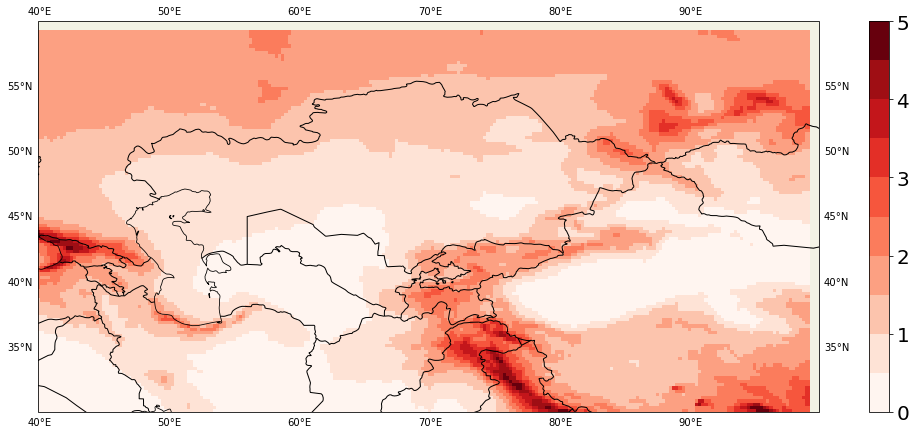

In [32]:
plot_errors_maps(mae,lons[:,:-1], lats[:,:-1], 0,5,11, plt.cm.Reds, 'rmse_GCM'+model+'.png')


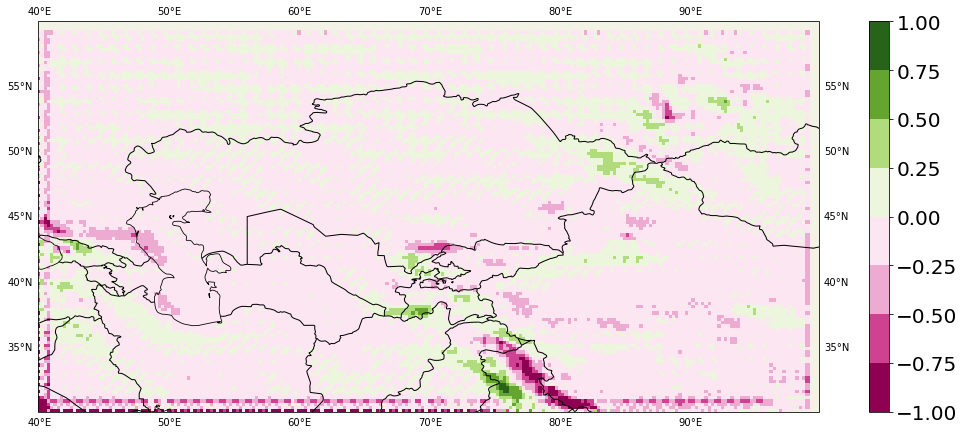

In [33]:
plot_errors_maps(mae[:,:].data-mae_ccn.data.numpy(),lons[:,:-1], lats[:,:-1], -1,1,9,
                  plt.cm.PiYG, 'rmse_GCM_CNN_error_reduction'+model+'.png')
